In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import researchpy as rp 

In [2]:
data = pd.read_csv('heart_disease.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data[['sex', 'target']] = data [['sex', 'target']].astype('object')
data.dtypes


age           int64
sex          object
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target       object
dtype: object

In [8]:
# select the numerical data 
num_cols = data.select_dtypes(exclude='object')
num_cols.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,3,145,233,1,0,150,0,2.3,0,0,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2
2,41,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
# summary statistics of numerical variables
rp.summary_cont(num_cols[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal','fbs', 'restecg', 'exang', 'slope', 'cp',]])


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age,303.0,54.3663,9.0821,0.5218,53.3396,55.3931
1,trestbps,303.0,131.6238,17.5381,1.0075,129.6411,133.6065
2,chol,303.0,246.2640,51.8308,2.9776,240.4046,252.1235
3,thalach,303.0,149.6469,22.9052,1.3159,147.0574,152.2363
4,oldpeak,303.0,1.0396,1.1611,0.0667,0.9083,1.1709
5,ca,303.0,0.7294,1.0226,0.0587,0.6138,0.8450
6,thal,303.0,2.3135,0.6123,0.0352,2.2443,2.3827
7,fbs,303.0,0.1485,0.3562,0.0205,0.1082,0.1888
8,restecg,303.0,0.5281,0.5259,0.0302,0.4686,0.5875
9,exang,303.0,0.3267,0.4698,0.0270,0.2736,0.3798


In [10]:
# select the categorical data
cat_cols = data.select_dtypes(include='object')
cat_cols.head()

,sex,target
0,1,1
1,1,1
2,0,1
3,1,1
4,0,1


In [11]:
# summary statistics of categorical variables
rp.summary_cat(cat_cols[['sex', 'target']])

,Variable,Outcome,Count,Percent
0,sex,1,207,68.32
1,,0,96,31.68
2,target,1,165,54.46
3,,0,138,45.54


In [12]:
# correlation matri: pearson correlation
num_cols.corr(method='pearson')


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
cp,-0.068653,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trestbps,0.279351,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalach,-0.398522,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exang,0.096801,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244
slope,-0.168814,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764


In [13]:
# skewness of numerical variables
num_cols.skew()

age        -0.202463
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
dtype: float64

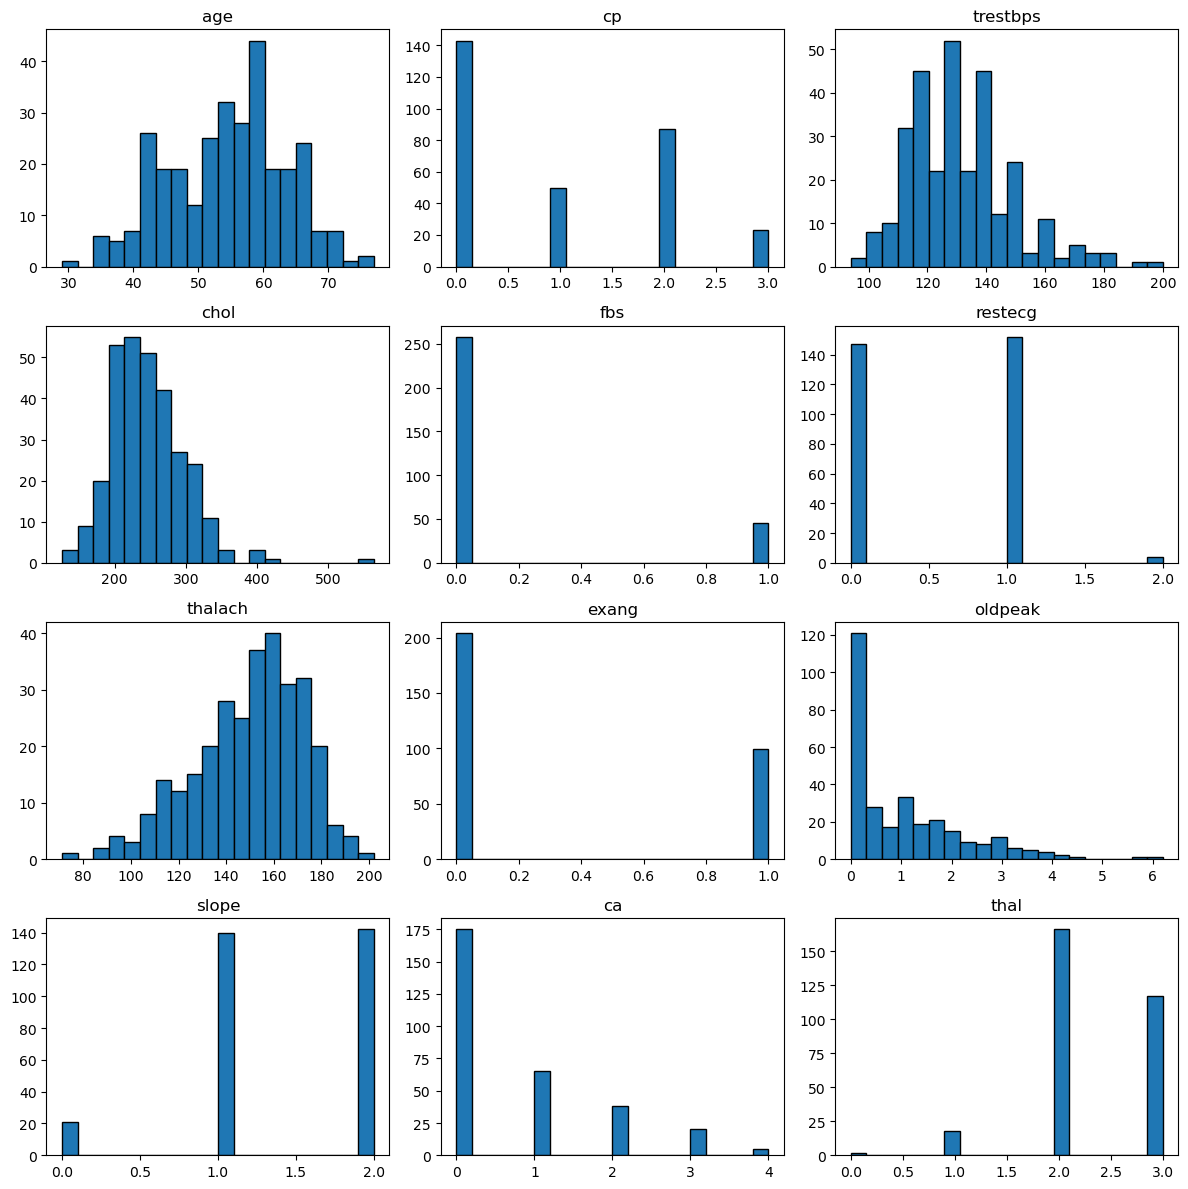

In [14]:
# Data Visualization 
# Univariate Analysis with Histograms
data.select_dtypes(include='number').hist(figsize=(12, 12), bins=20, edgecolor='black', grid=False) 
plt.tight_layout()  
plt.show()   

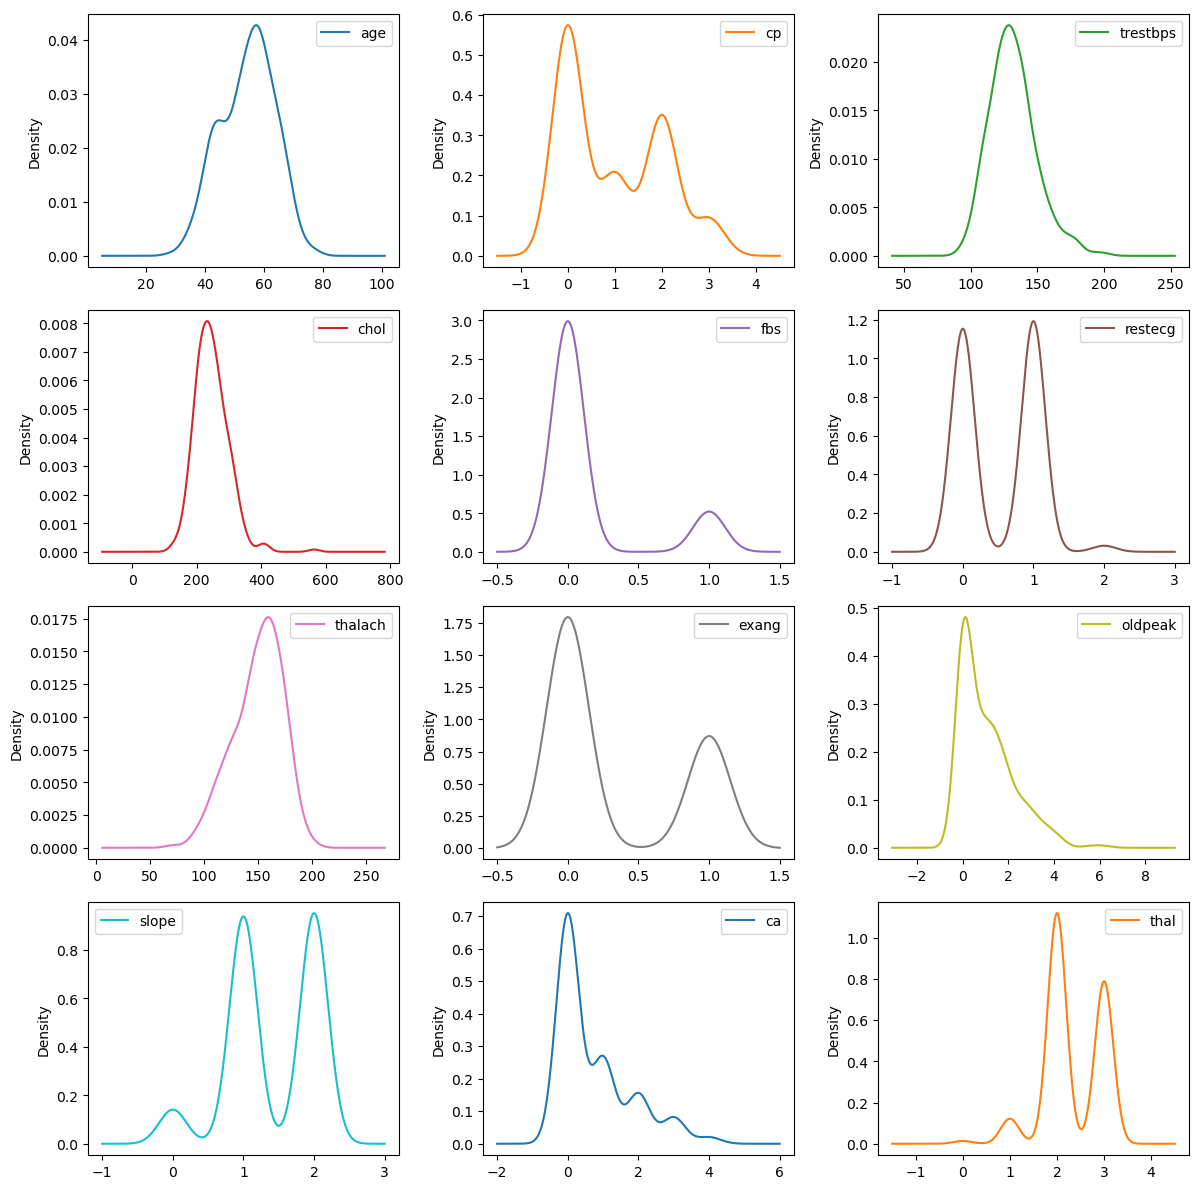

In [15]:
# Univariate Analysis with density plots
data.select_dtypes(include='number').plot(kind='density', subplots=True, layout=(4,3), sharex=False, figsize=(12, 12), legend=True,)
plt.tight_layout()
plt.show()

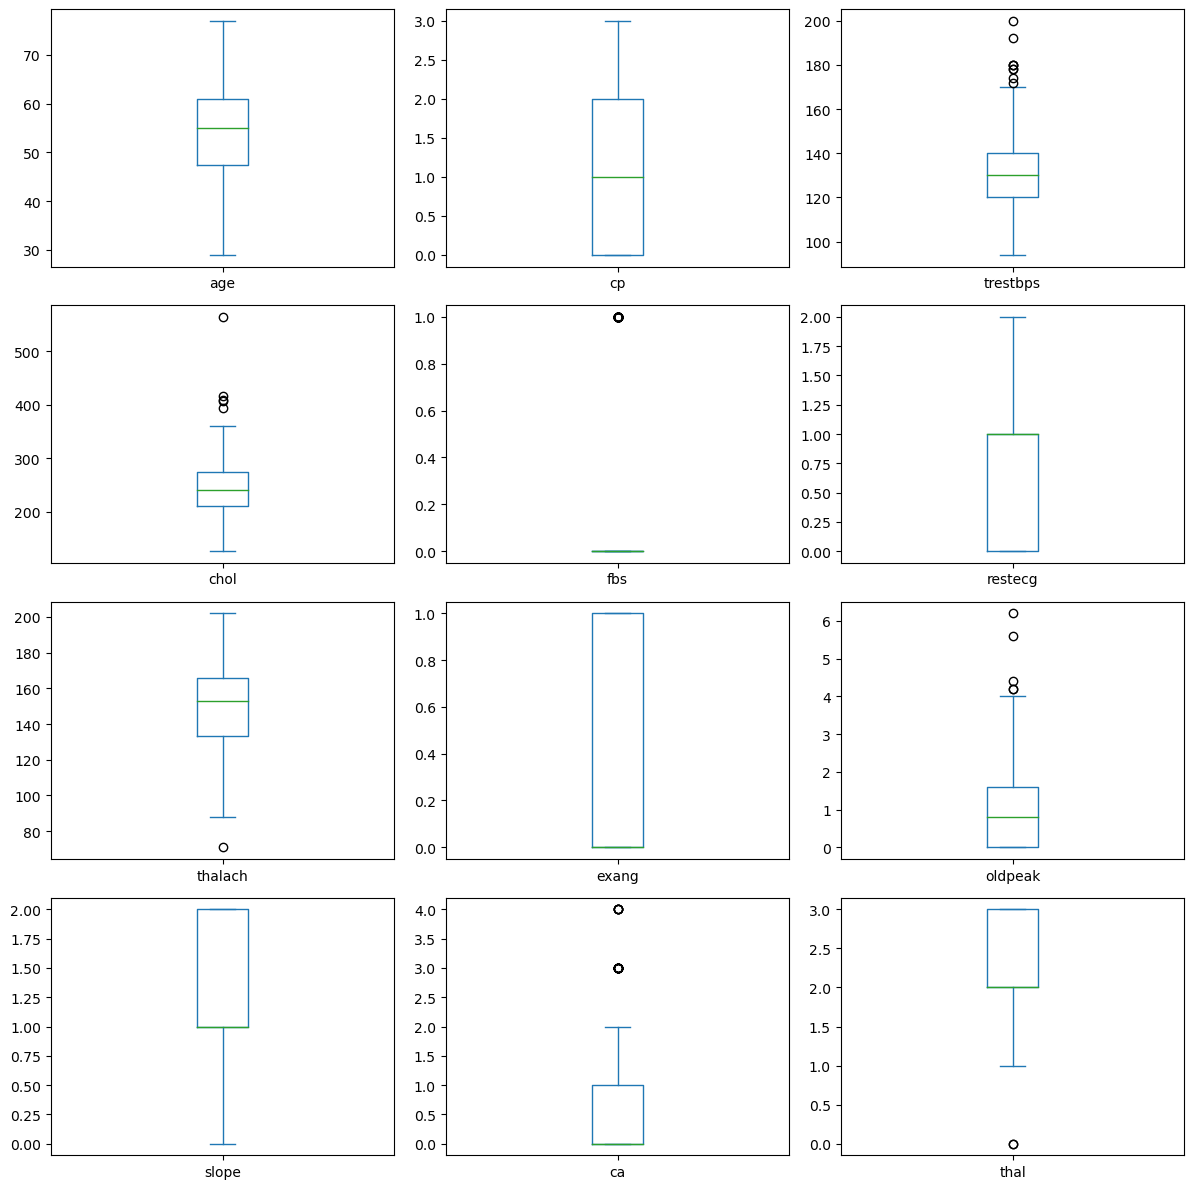

In [16]:
# Univariate Analysis with box plots
data.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(4,3), sharex=False, figsize=(12, 12), legend=True)
plt.tight_layout()
plt.show()

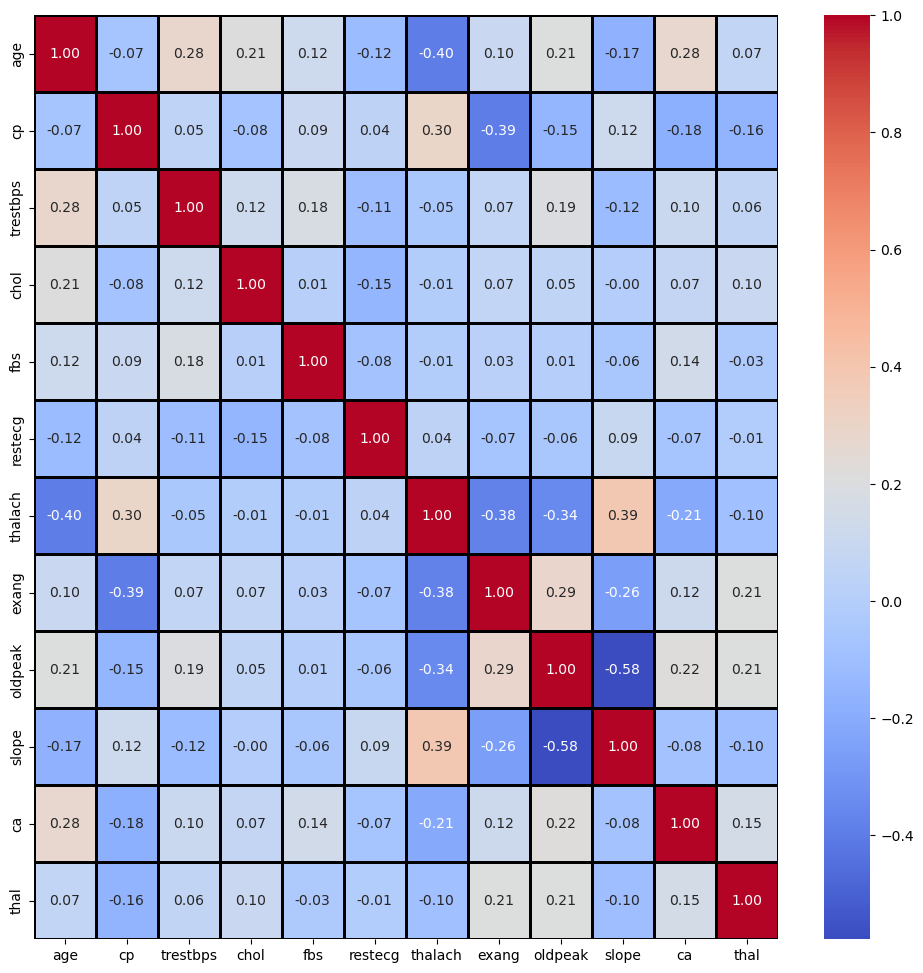

In [17]:
# multivariate analysis with heatmap
plt.figure(figsize=(12, 12)) 
sns.heatmap(num_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=2, linecolor='black')
plt.show()

In [18]:
# I want to install pycaret
# !pip install pycaret

In [19]:
# import pycaret
from pycaret.classification import *


In [20]:
setup(data, target='target', session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,12
8,Categorical features,1
9,Preprocess,True


In [21]:
# compare models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8201,0.9212,0.8576,0.8186,0.8303,0.6358,0.6510,0.0120
ridge,Ridge Classifier,0.8201,0.9171,0.8841,0.8069,0.8359,0.6346,0.6558,0.0100
rf,Random Forest Classifier,0.8201,0.8924,0.8583,0.8236,0.8335,0.6349,0.6474,0.0320
lda,Linear Discriminant Analysis,0.8201,0.9162,0.8841,0.8069,0.8359,0.6346,0.6558,0.0130
lr,Logistic Regression,0.8154,0.9171,0.8750,0.8061,0.8310,0.6245,0.6463,0.6280
et,Extra Trees Classifier,0.8108,0.9003,0.8508,0.8150,0.8240,0.6180,0.6342,0.0290
qda,Quadratic Discriminant Analysis,0.8013,0.9013,0.8152,0.8273,0.8112,0.5986,0.6111,0.0100
gbc,Gradient Boosting Classifier,0.7972,0.8802,0.8152,0.8122,0.8084,0.5900,0.5992,0.0260
lightgbm,Light Gradient Boosting Machine,0.7872,0.8706,0.8152,0.8199,0.8024,0.5683,0.5907,0.0390
dt,Decision Tree Classifier,0.7545,0.7546,0.7659,0.7890,0.7680,0.5068,0.5231,0.0120


In [22]:
# create a model
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9917,1.0000,0.8571,0.9231,0.8136,0.8281
1,0.8636,0.9583,1.0000,0.8000,0.8889,0.7179,0.7483
2,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
3,0.8095,0.9444,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
5,0.8571,0.9455,0.8182,0.9000,0.8571,0.7149,0.7182
6,0.9048,0.9000,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.6667,0.8273,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8571,0.9364,0.9091,0.8333,0.8696,0.7123,0.7156


In [23]:
# tune a model
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9917,1.0000,0.8571,0.9231,0.8136,0.8281
1,0.8636,0.9583,1.0000,0.8000,0.8889,0.7179,0.7483
2,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
3,0.8095,0.9444,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
5,0.8571,0.9455,0.8182,0.9000,0.8571,0.7149,0.7182
6,0.9048,0.9000,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.6667,0.8273,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8571,0.9364,0.9091,0.8333,0.8696,0.7123,0.7156


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


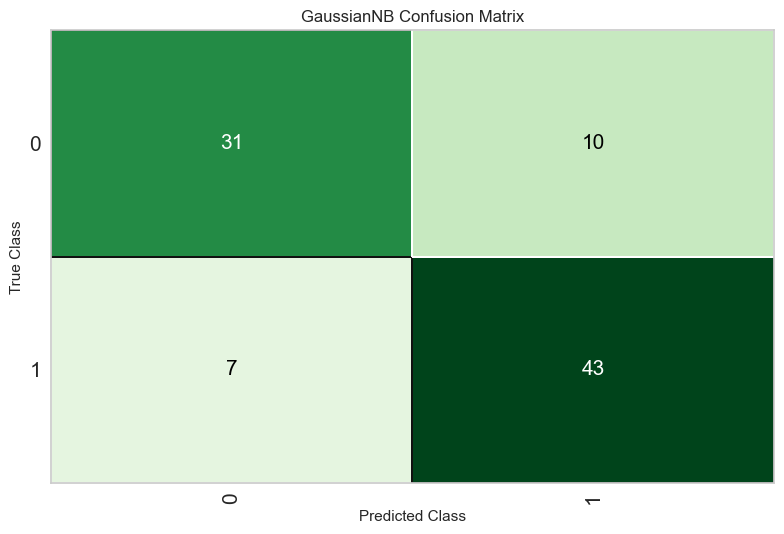

In [34]:
# plot a model
Con_matrix =plot_model(tuned_nb, plot='confusion_matrix')


In [35]:
# evaluate the model
eva_model = evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

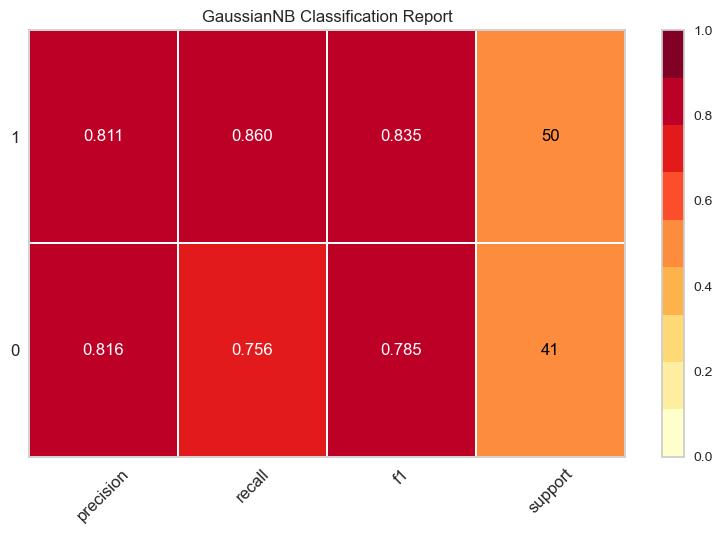

In [36]:
# plot a classification report
Cls_report = plot_model(tuned_nb, plot='class_report')

In [37]:
# finalize a model
final_nb = finalize_model(tuned_nb)
final_nb

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'cp', 'trestbps', 'chol',
                                             'fbs', 'restecg', 'thalach',
                                             'exang', 'oldpeak', 'slope', 'ca',
                                             'thal'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical...
                 TransformerWrapper(exclude=None, include=['sex'],
                                    transformer=OrdinalEncoder(cols=['sex'],
                                                               drop_invariant=False,
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                                               mapping=[{'col': 'sex',
                                                                         'data_type': dtype('float64'),
                                                                         'mapping': 0.0    0
1.0    1
NaN   -1
dtype: int64}],
                                                               return_df=True,
                                                               verbose=0))),
                ('actual_estimator',
                 GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [38]:
# predict on test data
predictions = predict_model(final_nb, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.8416,0.9103,0.8788,0.8382,0.8580,0.6791,0.6801


In [39]:
# show the predictions
predictions.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction_label,prediction_score
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0.6791
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0.6381
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0.9989
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0.9926
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0.9103


In [30]:
# copy data and drop clase variable
data2 = data.copy()
data2.drop('target', axis=1, inplace=True)
data2.head() 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
#predict on new data
new_data = data2.iloc[:10]
predict_new = predict_model(final_nb, data=new_data)
predict_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,prediction_label,prediction_score
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0,0.6791
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0,0.6381
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.9989
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.9926
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.9103


In [32]:
# save the model
save_model(final_nb, 'final_nb_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'cp', 'trestbps', 'chol',
                                              'fbs', 'restecg', 'thalach',
                                              'exang', 'oldpeak', 'slope', 'ca',
                                              'thal'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical...
                  TransformerWrapper(exclude=None, i

In [33]:
# load the model
loaded_nb = load_model('final_nb_model')
print(loaded_nb)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\shaki\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'cp', 'trestbps', 'chol',
                                             'fbs', 'restecg', 'thalach',
                                             'exang', 'oldpeak', 'slope', 'ca',
                                             'thal'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_val...
                 TransformerWrapper(exclude=None, include=['sex'],
                         